In [30]:
import cv2
from joblib import dump, load
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
import mpl_toolkits
import xarray as xr
import datetime
import time
import numpy as np
import pandas as pd
import netCDF4 as nc
from   netCDF4 import Dataset
from collections import Counter
import xarray as xr
import matplotlib.pyplot as plt
from   PIL import Image
import mpl_toolkits
from   mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from matplotlib.widgets import Button
from collections import Counter   

In [7]:
Li = Dataset('/home/LVM_date/zhoutt/datasets/H8Label_test/Li_H8Lb_20160109_0000_6001_6001.nc',mode='r')
Fu = Dataset('/home/LVM_date/zhoutt/datasets/H8Label_test/Fu_noQC_H8Lb_20160109_0000_6001_6001.nc',mode='r')
ref = Dataset('/home/LVM_date/data/H8/L1/201601/01/NC_H08_20160101_0000_R21_FLDK.06001_06001.nc')

In [8]:
print(ref.variables.keys())

dict_keys(['latitude', 'longitude', 'band_id', 'start_time', 'end_time', 'geometry_parameters', 'albedo_01', 'albedo_02', 'albedo_03', 'sd_albedo_03', 'albedo_04', 'albedo_05', 'albedo_06', 'tbb_07', 'tbb_08', 'tbb_09', 'tbb_10', 'tbb_11', 'tbb_12', 'tbb_13', 'tbb_14', 'tbb_15', 'tbb_16', 'SAZ', 'SAA', 'SOZ', 'SOA', 'Hour'])


In [12]:
Li_lb = Li.variables['cldmask'][:].data
Fu_lb = Fu.variables['cldmask'][:].data

In [19]:
aa = Li_lb - Fu_lb
flattened = [x for row in aa for x in row]
print(Counter(flattened))

Counter({0: 33759250, 1: 1821703, -1: 431048})


In [14]:
aa = Li_lb - Fu_lb
flattened = [x for row in aa for x in row]
print(Counter(flattened))

Counter({0: 32540375, 1: 3089688, -1: 381938})


In [32]:
# aa = np.unique(Li_lb)
unique_values, counts = np.unique(Li_lb, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 10366881
1: 25645120


## 绘制label 图，查看是否会受到era5影响，存在0.25度网格线（20230823郭斌组会提到的问题）

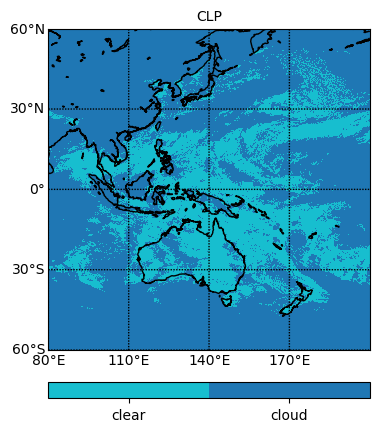

In [25]:
lon = ref.variables['longitude'][:].data
lat = ref.variables['latitude'][:].data 
lon0 = lon.mean()
lat0 = lat.mean()
m = Basemap(llcrnrlat = lat.min(), urcrnrlat = lat.max(), llcrnrlon = lon.min(), urcrnrlon = lon.max(), lat_0=lat0, lon_0=lon0, projection='cyl',resolution='l')
m.drawparallels(np.arange(lat.min(), lat.max()+1, 30).astype('int'), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(np.arange(lon.min(), lon.max(), 30), labels=[0, 0, 0, 1], fontsize=10)
m.drawcoastlines() # 绘制海岸线

x0, y0 = m(lon.min(), lat.min())
x1, y1 = m(lon.max(), lat.max())

cs = plt.imshow(Li_lb[:], interpolation='none', cmap=plt.cm.get_cmap('tab10_r',lut=2), extent = (x0, x1, y0, y1))
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([0.25,0.75])
cbar.ax.set_xticklabels(['clear','cloud'])
# 
font1 = {'family': 'DejaVu Sans', 'weight': 'normal', 'size': 16}
plt.title('CLP', font1,fontsize=10)
plt.show()